## **DATA SCIENCE PROJECT**

## **DATA PREPROCESSING STAGE**

# **Dataset : WHO Child Growth and Malnutrition Dataset**

**Student Number: PS/2019/259**

**Name : S.A. WEERASINGHE**

**IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

**MOUNT GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**LOAD THE DATASET**

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/DataScience/Project/DataPreprocessing/Presentation/ChildGrowthDataset-DataProcessing.csv', encoding='latin-1')

<ipython-input-3-af5cd7b3974b>:1: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/DataScience/Project/DataPreprocessing/Presentation/ChildGrowthDataset-DataProcessing.csv', encoding='latin-1')


**DISPLAY THE FIRST FIVE ROWS OF THE DATASET**

In [4]:
df1.head()

,ISOCODE,REFNO,NAME_SHORT_EN,GEOCODE_0,ADMLEVEL,GEOCODE_1,ADMLEVEL1,GEOCODE_2,ADMLEVEL2,YEAR,...,R_SCORE_E,SELREC,JME_SELREC,ENTRYD,LASTUPD,MEAN_YEAR,LOCATIONTYPE,Short_Source_Code,AUTHOR,REFERENCE TITLE
0,AFG,10055,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2022-2023,...,NaN,True,Selected for JME,1,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
1,AFG,10055,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2022-2023,...,NaN,False,Not selected for JME,2,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
2,AFG,10055,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2022-2023,...,NaN,False,Not selected for JME,3,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
3,AFG,10055,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2022-2023,...,NaN,False,Not selected for JME,4,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
4,AFG,10055,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2022-2023,...,NaN,False,Not selected for JME,5,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...


**THE NUMBER OF ROWS AND COLUMNS IN THE ORIGINAL DATASET**

In [5]:
df1.shape

(41629, 168)

## **STAGE 01 : DATA CLEANING**

## **TIDYING THE MESSY DATA**

**PREPROCESSING STEP 1 : Drop the fully or nearly empty columns in the dataset**


In [6]:
# Calculate the percentage of missing values for each column
missing_percent = df1.isnull().mean() * 100

# Round the percentages to two decimal points and add a percentage sign
missing_percent = missing_percent.round(2).astype(str) + '%'

# Display columns with a high percentage of missing values
threshold = 60  # Define the threshold for "nearly empty" columns
nearly_empty_columns = missing_percent[df1.isnull().mean() * 100 > threshold]

# Display the columns and their percentages
print("Nearly Empty Columns with its percentage of missing values:")
print(nearly_empty_columns)

# Drop the nearly empty columns from the dataset
columns_to_drop = df1.columns[df1.isnull().mean() * 100 > threshold]
df2 = df1.drop(columns=columns_to_drop)

# The total number of rows and columns after drop those columns
df2.shape

print("The total number of columns droped from the original dataset:", len(columns_to_drop))

Nearly Empty Columns with its percentage of missing values:
ADMLEVEL     96.11%
GEOCODE_1    100.0%
ADMLEVEL1    73.45%
GEOCODE_2    100.0%
ADMLEVEL2    99.93%
MEDUC        96.67%
WEALTHQ      91.99%
NOTES        62.19%
R_SCORE_E    100.0%
dtype: object
The total number of columns droped from the original dataset: 9


In [7]:
df2.head()

,ISOCODE,REFNO,NAME_SHORT_EN,GEOCODE_0,YEAR,YEAR_START,YEAR_END,MONTH,MONTH_START,MONTH_END,...,BAZ_SD,SELREC,JME_SELREC,ENTRYD,LASTUPD,MEAN_YEAR,LOCATIONTYPE,Short_Source_Code,AUTHOR,REFERENCE TITLE
0,AFG,10055,Afghanistan,AFG,2022-2023,2022,2023,SEP-FEB,SEP,FEB,...,1.21002,True,Selected for JME,1,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
1,AFG,10055,Afghanistan,AFG,2022-2023,2022,2023,SEP-FEB,SEP,FEB,...,1.64565,False,Not selected for JME,2,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
2,AFG,10055,Afghanistan,AFG,2022-2023,2022,2023,SEP-FEB,SEP,FEB,...,1.29969,False,Not selected for JME,3,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
3,AFG,10055,Afghanistan,AFG,2022-2023,2022,2023,SEP-FEB,SEP,FEB,...,1.19613,False,Not selected for JME,4,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
4,AFG,10055,Afghanistan,AFG,2022-2023,2022,2023,SEP-FEB,SEP,FEB,...,1.16606,False,Not selected for JME,5,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...


**PREPROCESSING STEP 2: Finding the columns with completely the same set of values for all the rows (Duplicate columns)**

In [8]:
# Function to find columns with identical values row-wise
def find_identical_columns(df):
    identical_columns = []
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and df[col1].equals(df[col2]):
                identical_columns.append((col1, col2))
    return identical_columns


In [9]:
# Find and print identical columns
identical_columns = find_identical_columns(df2)
if identical_columns:
    print("Columns with identical values:")
    for col1, col2 in identical_columns:
        print(f"{col1} and {col2}")
else:
    print("No identical columns found.")

Columns with identical values:
ISOCODE and GEOCODE_0
GEOCODE_0 and ISOCODE


In [10]:
df2 = df2.drop('GEOCODE_0', axis=1) # Use 'columns' instead of 'column' and specify axis=1 to indicate column drop

In [11]:
df2.head()

,ISOCODE,REFNO,NAME_SHORT_EN,YEAR,YEAR_START,YEAR_END,MONTH,MONTH_START,MONTH_END,AREA,...,BAZ_SD,SELREC,JME_SELREC,ENTRYD,LASTUPD,MEAN_YEAR,LOCATIONTYPE,Short_Source_Code,AUTHOR,REFERENCE TITLE
0,AFG,10055,Afghanistan,2022-2023,2022,2023,SEP-FEB,SEP,FEB,BOTH,...,1.21002,True,Selected for JME,1,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
1,AFG,10055,Afghanistan,2022-2023,2022,2023,SEP-FEB,SEP,FEB,BOTH,...,1.64565,False,Not selected for JME,2,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
2,AFG,10055,Afghanistan,2022-2023,2022,2023,SEP-FEB,SEP,FEB,BOTH,...,1.29969,False,Not selected for JME,3,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
3,AFG,10055,Afghanistan,2022-2023,2022,2023,SEP-FEB,SEP,FEB,BOTH,...,1.19613,False,Not selected for JME,4,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...
4,AFG,10055,Afghanistan,2022-2023,2022,2023,SEP-FEB,SEP,FEB,BOTH,...,1.16606,False,Not selected for JME,5,2024-03-13T00:00:00+01:00,2022,CNTRY,MICS,UNICEF,Afghanistan Multiple Indicator Cluster Survey ...


In [12]:
df2.shape

(41629, 158)

**PREPROCESSING STEP 3: Remove the irrelevant metadata columns**

In [13]:
# List of metadata columns to be removed
metadata_columns = ['ISOCODE','REFNO','REFERENCE TITLE', 'AUTHOR', 'LASTUPD','LOCATIONTYPE','Short_Source_Code','ENTRYD','MONTH','MONTH_END','MONTH_START','OEDEMA','JME_SELREC']

#rename the NAME_SHORT_EN" to "Country"
df2.rename(columns={'NAME_SHORT_EN': 'Country'}, inplace=True)

# Drop the metadata columns
df3 = df2.drop(columns=metadata_columns)

df3.shape


(41629, 145)

**PREPROCESSING STEP 4 : Replace the "YEAR_START" and "YEAR_END" columns by a single column of its mean value**

In [14]:
# Remove the 'MEAN_YEAR' and 'YEAR' columns if they exist
df3 = df3.drop(columns=['MEAN_YEAR', 'YEAR'], errors='ignore')

# Calculate the mean year and add it as a new column
df3['YEAR'] = ((df3['YEAR_START'] + df3['YEAR_END']) / 2).round().astype(int)

# Drop the 'YEAR_START' and 'YEAR_END' columns
df4 = df3.drop(columns=['YEAR_START', 'YEAR_END'])

# Get the list of columns
columns = df4.columns.tolist()

# Find the index of 'NAME_SHORT_EN'
name_short_en_index = columns.index('Country')

# Remove 'YEAR' from its current position (if it exists)
if 'YEAR' in columns:
    columns.remove('YEAR')

# Insert 'YEAR' right after 'NAME_SHORT_EN'
columns.insert(name_short_en_index + 1, 'YEAR')

# Reorder DataFrame columns
df4 = df4[columns]

# Print the updated DataFrame
df4.head()

,Country,YEAR,AREA,SEX,AGEGROUP,AGE_START,AGE_END,N_WH_UNWGT,N_WH_WGT,WH_3,...,BA3,BA3_SE,BA3_LOW,BA3_UP,BAZ_MEAN,BAZ_MEAN_SE,BAZ_MEAN_LOW,BAZ_MEAN_UP,BAZ_SD,SELREC
0,Afghanistan,2022,BOTH,BTSX,0. - 4.99,0,59,32303.0,32247.5,1.20261,...,1.56584,0.09637,1.38753,1.76665,0.30666,0.01436,0.27848,0.33483,1.21002,True
1,Afghanistan,2022,BOTH,BTSX,0. - 0.49,0,5,3178.0,3166.3,2.52439,...,4.46590,0.54783,3.50597,5.67321,0.16146,0.05156,0.06027,0.26264,1.64565,False
2,Afghanistan,2022,BOTH,BTSX,0.50 - 0.99,6,11,3123.0,3156.9,1.97696,...,1.08812,0.25576,0.68534,1.72354,-0.09073,0.03303,-0.15556,-0.02591,1.29969,False
3,Afghanistan,2022,BOTH,BTSX,1. - 1.99,12,23,6072.0,6274.2,1.33964,...,1.47377,0.19967,1.12913,1.92156,0.23194,0.02434,0.18417,0.27971,1.19613,False
4,Afghanistan,2022,BOTH,BTSX,2. - 2.99,24,35,6230.0,6109.6,0.94883,...,1.89852,0.20953,1.52815,2.35651,0.52061,0.02256,0.47633,0.56490,1.16606,False


**PREPROCESSING STEP 5: Remove all the data records before the year of 2000**

In [15]:
# Calculate total number of records
total_records = len(df4)

# Calculate the number of records before and after the year 2000
before_2000 = df4[df4['YEAR'] < 2000].shape[0]
after_2000 = df4[df4['YEAR'] >= 2000].shape[0]

# Compute percentages
percent_before_2000 = (before_2000 / total_records) * 100
percent_after_2000 = (after_2000 / total_records) * 100

# Display the results
print(f"Total records: {total_records}")
print(f"Records before 2000: {before_2000} ({percent_before_2000:.2f}%)")
print(f"Records from 2000 onwards: {after_2000} ({percent_after_2000:.2f}%)")

Total records: 41629
Records before 2000: 7643 (18.36%)
Records from 2000 onwards: 33986 (81.64%)


In [16]:
# Remove rows where YEAR is less than 2000
df5 = df4[df4['YEAR'] >= 2000]

df5.shape

(33986, 142)

**PREPROCESSING STEP 6: Replace age groups by Mean Age**

In [17]:
df5 = df5.copy()

# Calculate the mean age in months and add it as a new column
df5.loc[:, 'AGE'] = (((df5['AGE_START'] + df5['AGE_END']) / 2)).round().astype(int)

# Convert AGE from months to years
df5['AGE'] = (df5['AGE'] / 12).round(2)

# Drop the 'AGE_START' and 'AGE_END' columns
df6 = df5.drop(columns=['AGE_START', 'AGE_END','AGEGROUP'])

# Get the list of columns
columns = df6.columns.tolist()

# Find the index of 'SEX'
sex_index = columns.index('SEX')

# Remove 'AGE' from its current position (if it exists)
if 'AGE' in columns:
    columns.remove('AGE')

# Insert 'AGE' right after 'SEX'
columns.insert(sex_index + 1, 'AGE')

# Reorder DataFrame columns
df6 = df6[columns]

# Print the updated DataFrame
df6.head()


,Country,YEAR,AREA,SEX,AGE,N_WH_UNWGT,N_WH_WGT,WH_3,WH_3_SE,WH_3_LOW,...,BA3,BA3_SE,BA3_LOW,BA3_UP,BAZ_MEAN,BAZ_MEAN_SE,BAZ_MEAN_LOW,BAZ_MEAN_UP,BAZ_SD,SELREC
0,Afghanistan,2022,BOTH,BTSX,2.50,32303.0,32247.5,1.20261,0.08160,1.05255,...,1.56584,0.09637,1.38753,1.76665,0.30666,0.01436,0.27848,0.33483,1.21002,True
1,Afghanistan,2022,BOTH,BTSX,0.17,3178.0,3166.3,2.52439,0.36015,1.90613,...,4.46590,0.54783,3.50597,5.67321,0.16146,0.05156,0.06027,0.26264,1.64565,False
2,Afghanistan,2022,BOTH,BTSX,0.67,3123.0,3156.9,1.97696,0.28174,1.49355,...,1.08812,0.25576,0.68534,1.72354,-0.09073,0.03303,-0.15556,-0.02591,1.29969,False
3,Afghanistan,2022,BOTH,BTSX,1.50,6072.0,6274.2,1.33964,0.18525,1.02077,...,1.47377,0.19967,1.12913,1.92156,0.23194,0.02434,0.18417,0.27971,1.19613,False
4,Afghanistan,2022,BOTH,BTSX,2.50,6230.0,6109.6,0.94883,0.16166,0.67883,...,1.89852,0.20953,1.52815,2.35651,0.52061,0.02256,0.47633,0.56490,1.16606,False


In [18]:
df6.shape

(33986, 140)

**PREPROCESSING STEP 7: Remove the AREA column**

Remove the rows that specifically data collected from rural and urban areas seperately, because majority of the data collected by considering rural and urban area together. Then remove the column of "AREA" because now the dataset consists the data records of both rural and urban areas equally considered.

In [19]:
# Get the counts and percentages of each unique value in the 'AREA' column
area_counts = df6['AREA'].value_counts()
area_percentages = (area_counts / len(df6)) * 100

# Round percentages to two decimal places and add a percentage mark
area_percentages = area_percentages.round(2).astype(str) + '%'

# Combine counts and percentages into a single DataFrame for better readability
result = pd.DataFrame({
    'Count': area_counts,
    'Percentage': area_percentages
})

# Print the result
print(result)

               Count Percentage
AREA                           
BOTH           32253      94.9%
NUTRITION_RUR    880      2.59%
NUTRITION_URB    853      2.51%


In [20]:
# Delete rows where 'AREA' is either 'NUTRITION_RUR' or 'NUTRITION_URB'
df7 = df6[~df6['AREA'].isin(['NUTRITION_RUR', 'NUTRITION_URB'])]

#Delete the area column
df7 = df7.drop(columns=['AREA'])

df7.shape

(32253, 139)

**Rename the values in the "SEX" feature for more clarity**

In [21]:
# Replace specific values in the 'SEX' column
df7['SEX'] = df7['SEX'].replace({
    'NUTRITION_FEMALE': 'female',
    'NUTRITION_MALE': 'male'
}, regex=False)

# Replace all other values with 'both'
df7['SEX'] = df7['SEX'].apply(lambda x: x if x in ['female', 'male'] else 'both')

# Rename the 'SEX' column to 'Gender'
df7.rename(columns={'SEX': 'Gender'}, inplace=True)

# Print the first few rows to check the changes
df7.head()


,Country,YEAR,Gender,AGE,N_WH_UNWGT,N_WH_WGT,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,...,BA3,BA3_SE,BA3_LOW,BA3_UP,BAZ_MEAN,BAZ_MEAN_SE,BAZ_MEAN_LOW,BAZ_MEAN_UP,BAZ_SD,SELREC
0,Afghanistan,2022,both,2.50,32303.0,32247.5,1.20261,0.08160,1.05255,1.37375,...,1.56584,0.09637,1.38753,1.76665,0.30666,0.01436,0.27848,0.33483,1.21002,True
1,Afghanistan,2022,both,0.17,3178.0,3166.3,2.52439,0.36015,1.90613,3.33637,...,4.46590,0.54783,3.50597,5.67321,0.16146,0.05156,0.06027,0.26264,1.64565,False
2,Afghanistan,2022,both,0.67,3123.0,3156.9,1.97696,0.28174,1.49355,2.61269,...,1.08812,0.25576,0.68534,1.72354,-0.09073,0.03303,-0.15556,-0.02591,1.29969,False
3,Afghanistan,2022,both,1.50,6072.0,6274.2,1.33964,0.18525,1.02077,1.75635,...,1.47377,0.19967,1.12913,1.92156,0.23194,0.02434,0.18417,0.27971,1.19613,False
4,Afghanistan,2022,both,2.50,6230.0,6109.6,0.94883,0.16166,0.67883,1.32478,...,1.89852,0.20953,1.52815,2.35651,0.52061,0.02256,0.47633,0.56490,1.16606,False


**PREPROCESSING STEP 8 : Getting mean sample size**

In [22]:
# Calculate the mean sample size
df7['MeanSampleSize'] = df7[['N_WH_UNWGT', 'N_HA_UNWGT', 'N_WA_UNWGT', 'N_BA_UNWGT']].mean(axis=1)

# Reorder columns to place 'MeanSampleSize' after 'AGE'
cols = list(df7.columns)
age_index = cols.index('AGE')
cols.insert(age_index + 1, cols.pop(cols.index('MeanSampleSize')))
df8 = df7[cols].copy()  # Use .copy() to create a copy of the DataFrame slice

# Drop the original sample size columns in the new DataFrame
df8.drop(columns=['N_WH_UNWGT', 'N_HA_UNWGT', 'N_WA_UNWGT', 'N_BA_UNWGT'], inplace=True)

# Print the shape of df9 to check the result
print(df8.shape)

# Print the updated DataFrame
df8.head()


(32253, 136)


,Country,YEAR,Gender,AGE,MeanSampleSize,N_WH_WGT,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,...,BA3,BA3_SE,BA3_LOW,BA3_UP,BAZ_MEAN,BAZ_MEAN_SE,BAZ_MEAN_LOW,BAZ_MEAN_UP,BAZ_SD,SELREC
0,Afghanistan,2022,both,2.50,32324.50,32247.5,1.20261,0.08160,1.05255,1.37375,...,1.56584,0.09637,1.38753,1.76665,0.30666,0.01436,0.27848,0.33483,1.21002,True
1,Afghanistan,2022,both,0.17,3247.50,3166.3,2.52439,0.36015,1.90613,3.33637,...,4.46590,0.54783,3.50597,5.67321,0.16146,0.05156,0.06027,0.26264,1.64565,False
2,Afghanistan,2022,both,0.67,3117.50,3156.9,1.97696,0.28174,1.49355,2.61269,...,1.08812,0.25576,0.68534,1.72354,-0.09073,0.03303,-0.15556,-0.02591,1.29969,False
3,Afghanistan,2022,both,1.50,6054.75,6274.2,1.33964,0.18525,1.02077,1.75635,...,1.47377,0.19967,1.12913,1.92156,0.23194,0.02434,0.18417,0.27971,1.19613,False
4,Afghanistan,2022,both,2.50,6234.25,6109.6,0.94883,0.16166,0.67883,1.32478,...,1.89852,0.20953,1.52815,2.35651,0.52061,0.02256,0.47633,0.56490,1.16606,False


**PREPROCESSING STEP 9: REMOVE THE COLUMNS OF UNNECESSARY STATISTICAL CALCULATION VALUES**

**Those cloumns are not included directly collected data for the malnutrition. Therefore, the data columns directly related to the malnutrition parameters such as wasting,  overweight, obesity, stunting, underweight are kept while other columns removed from the dataset. Because those data columns are some kind of unnecessary burden for this project.**

In [23]:
df9_1 = df8.drop(columns = ['N_WH_WGT','WHZ_MEAN','WHZ_MEAN_SE', 'WHZ_MEAN_LOW','WHZ_MEAN_UP','WHZ_SD','N_HA_WGT','HAZ_MEAN','HAZ_MEAN_SE', 'HAZ_MEAN_LOW','HAZ_MEAN_UP','HAZ_SD',
                          'WAZ_MEAN','WAZ_MEAN_SE', 'WAZ_MEAN_LOW','WAZ_MEAN_UP','WAZ_SD',
                          'BA_2_SE','BA_2_LOW','BA_2_UP',
                          'BA_1_SE','BA_1_LOW','BA_1_UP','BA2_SE','BA2_LOW','BA2_UP',])

df9_1.shape

(32253, 110)

In [24]:
df9_2 = df9_1.drop(columns = ['BA1_SE','BA1_LOW','BA1_UP','BAZ_MEAN','BAZ_MEAN_SE', 'BAZ_MEAN_LOW','BAZ_MEAN_UP','BAZ_SD',
                          'N_HA_WH_UNWGT','N_HA_WH_WGT','HA_2_WH_2','HA_2_WH_2_SE','HA_2_WH_2_LOW','HA_2_WH_2_UP',
                          'HA_2_WH2','HA_2_WH2_SE','HA_2_WH2_LOW','HA_2_WH2_UP','HA_1_SE','HA_1_LOW','HA_1_UP',
                          'HA3_SE','HA3_LOW','HA3_UP',
                          'HA2_SE','HA2_LOW','HA2_UP',
                          'HA1_SE','HA1_LOW','HA1_UP',])

df9_2.shape

(32253, 80)

In [25]:
df9_3 = df9_2.drop(columns = ['HA_3_SE','HA_3_LOW','HA_3_UP',
                          'BA_2','BA_1',
                          'BA2','BA1'])

df9_3.shape

(32253, 73)

In [26]:
df9_4 = df9_3.drop(columns = ['N_BA_WGT','N_WA_WGT','WA_1', 'WA_1_SE',
                          'WA_1_LOW', 'WA_1_UP', 'WA1', 'WA1_SE', 'WA1_LOW', 'WA1_UP', 'WA2',
                           'WA2_SE', 'WA2_LOW', 'WA2_UP', 'WA3', 'WA3_SE', 'WA3_LOW', 'WA3_UP','HA_3','WA_3', 'WA_3_SE', 'WA_3_LOW', 'WA_3_UP','HA_1', 'HA1',
                          'HA2', 'HA3',])

df9_4.shape

(32253, 46)

In [27]:
df9 = df9_4.copy()

In [28]:
df9.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,Afghanistan,2022,both,2.50,32324.50,1.20261,0.08160,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.09708,1.07576,1.45821,1.56584,0.09637,1.38753,1.76665,True
1,Afghanistan,2022,both,0.17,3247.50,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.46590,0.54783,3.50597,5.67321,False
2,Afghanistan,2022,both,0.67,3117.50,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,False
3,Afghanistan,2022,both,1.50,6054.75,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,False
4,Afghanistan,2022,both,2.50,6234.25,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,False


**PREPROCESSING STEP 10: Handling the Missing Values**

In [29]:
missing_values = df9.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

df10 = df9.copy()

MeanSampleSize    2630
WH_3              1325
WH_3_SE           4934
WH_3_LOW          3287
WH_3_UP           3325
WH_2               921
WH_2_SE           3940
WH_2_LOW          3257
WH_2_UP           3257
WH_1              3631
WH_1_SE           3651
WH_1_LOW          3631
WH_1_UP           3631
WH1               2520
WH1_SE            3633
WH1_LOW           3631
WH1_UP            3631
WH2               1525
WH2_SE            3677
WH2_LOW           3364
WH2_UP            3364
WH3               2195
WH3_SE            4847
WH3_LOW           3549
WH3_UP            3549
HA_2               793
HA_2_SE           3594
HA_2_LOW          3198
HA_2_UP           3198
WA_2               756
WA_2_SE           3759
WA_2_LOW          3170
WA_2_UP           3170
BA_3              2802
BA_3_SE           4974
BA_3_LOW          3744
BA_3_UP           3744
BA3               2782
BA3_SE            4812
BA3_LOW           3744
BA3_UP            3744
dtype: int64


**PREPROCESSING STEP 11: Fill missing values with the mean value of each colunm (Mean Imputation)**

**(Except MeanSampleSize column)**

In [30]:
# List of columns with missing values
columns_with_missing_values = missing_values.index.tolist()

# Exclude "MeanSampleSize" from the columns to fill
columns_to_fill = [col for col in columns_with_missing_values if col != 'MeanSampleSize']

# Fill missing values with the mean of each column
for column in columns_to_fill:
    mean_value = df10[column].mean()
    df10[column].fillna(mean_value, inplace=True)

# Verify the changes
missing_values = df10.isnull().sum()
print(missing_values)

df11 = df10.copy()

Country              0
YEAR                 0
Gender               0
AGE                  0
MeanSampleSize    2630
WH_3                 0
WH_3_SE              0
WH_3_LOW             0
WH_3_UP              0
WH_2                 0
WH_2_SE              0
WH_2_LOW             0
WH_2_UP              0
WH_1                 0
WH_1_SE              0
WH_1_LOW             0
WH_1_UP              0
WH1                  0
WH1_SE               0
WH1_LOW              0
WH1_UP               0
WH2                  0
WH2_SE               0
WH2_LOW              0
WH2_UP               0
WH3                  0
WH3_SE               0
WH3_LOW              0
WH3_UP               0
HA_2                 0
HA_2_SE              0
HA_2_LOW             0
HA_2_UP              0
WA_2                 0
WA_2_SE              0
WA_2_LOW             0
WA_2_UP              0
BA_3                 0
BA_3_SE              0
BA_3_LOW             0
BA_3_UP              0
BA3                  0
BA3_SE               0
BA3_LOW    

**Handling the missing values in the MeanSampleSize Column**

**Identifying the range of the MeanSampleSize column**

In [31]:
# Ensure there are no NaN values in the column before performing calculations
mean_sample_size_col = df11['MeanSampleSize'].dropna()

# Get the minimum value excluding zero
min_value = mean_sample_size_col[mean_sample_size_col != 0].min()

# Get the maximum value
max_value = mean_sample_size_col.max()

print(f"Minimum value in 'MeanSampleSize': {min_value}")
print(f"Maximum value in 'MeanSampleSize': {max_value}")


Minimum value in 'MeanSampleSize': 0.75
Maximum value in 'MeanSampleSize': 239361.5


Since this "MeanSampleSize" column contains a large range of data, it is impractical to handle those missing values with the Mean imputation method.
Therefore, the best and safer way to handle them is dropping the rows with missing sample size from the dataset.
Because malnutrition parameters depend on the child sample that they have considered for the surveys, it would not be effective to fill the missing valuse with other representative value.

In [32]:
# Drop rows where 'MeanSampleSize' is NaN
df11 = df11.dropna(subset=['MeanSampleSize'])

# Verify the result by checking if there are any more missing values in 'MeanSampleSize'
print("The Total Number of Missing Values in the MeanSampleSize column:",df11['MeanSampleSize'].isnull().sum())

# Print the shape of the DataFrame to see the number of rows and columns after dropping
print("The Total Number of Rows and Columns in the dataset after handling the missing values: ", df11.shape)


The Total Number of Missing Values in the MeanSampleSize column: 0
The Total Number of Rows and Columns in the dataset after handling the missing values:  (29623, 46)


**PREPROCESSING STEP 12: Handling the Outliers of the dataset**

In [33]:
import pandas as pd

# Automatically identify all numerical columns in the dataset
numerical_columns = df11.select_dtypes(include=[np.number]).columns.tolist()


**Print all the outlier in each feature**

In [34]:
from scipy import stats
import numpy as np

# Set a threshold for Z-score
z_threshold = 3

# Create a dictionary to store outliers for each column
z_outliers = {}

for col in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df11[col].dropna()))

    # Identify outliers
    outliers = np.where(z_scores > z_threshold)

    # Store the outliers
    z_outliers[col] = df11.iloc[outliers][col]

# Print outliers for each column identified by Z-score method
for col, outliers in z_outliers.items():
    print(f'Outliers in {col} using Z-score method:')
    print(outliers)
    print()


Outliers in YEAR using Z-score method:
Series([], Name: YEAR, dtype: int64)

Outliers in AGE using Z-score method:
Series([], Name: AGE, dtype: float64)

Outliers in MeanSampleSize using Z-score method:
0         32324.50
8         19898.50
36        26723.75
92        21335.50
155       20052.50
           ...    
39630     23882.25
39912     97641.00
39976    100735.00
40111     58025.00
40489     18157.75
Name: MeanSampleSize, Length: 308, dtype: float64

Outliers in WH_3 using Z-score method:
137      10.85148
142      11.71892
144      11.38635
146       9.15010
152      11.21309
           ...   
40633     9.17689
40636    16.98180
40638    14.63603
40643     8.95305
40645    15.19441
Name: WH_3, Length: 543, dtype: float64

Outliers in WH_3_SE using Z-score method:
135      2.45599
137      2.46292
142      2.33996
152      2.27014
404      4.12316
          ...   
40788    2.30130
40792    4.32612
40815    2.54868
40856    3.04275
41318    2.32904
Name: WH_3_SE, Length: 571, dt

**Calculate the total number of distinct outliers in the dataset**

To determine the need of removing them from the dataset or performing another mechanism to handle those outliers

In [35]:
import numpy as np
from scipy import stats

# Set a threshold for Z-score
z_threshold = 3

# Create a set to store unique outlier indices
unique_outlier_indices = set()

for col in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df11[col].dropna()))

    # Identify outliers
    outlier_indices = np.where(z_scores > z_threshold)[0]

    # Add the outlier indices to the set
    unique_outlier_indices.update(df11.index[outlier_indices])

# Print the total number of distinct outliers
print(f'Total number of distinct outliers: {len(unique_outlier_indices)}')


Total number of distinct outliers: 3767


In [36]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to each numerical column
for col in numerical_columns:
    # Winsorize the column, capping the top and bottom 10%
    df11[col] = winsorize(df11[col], limits=[0.1, 0.1])

df12 = df11.copy()
# Print the winsorized DataFrame to verify
print("winsorized DataFrame:")
df12.head()



winsorized DataFrame:


,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,Afghanistan,2020,both,2.50,3683.5,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,True
1,Afghanistan,2020,both,0.67,3247.5,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,False
2,Afghanistan,2020,both,0.67,3117.5,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,False
3,Afghanistan,2020,both,1.50,3683.5,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,False
4,Afghanistan,2020,both,2.50,3683.5,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,False


In [37]:
# Set a threshold for Z-score
z_threshold = 3

# Create a set to store unique outlier indices
unique_outlier_indices = set()

for col in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df11[col].dropna()))

    # Identify outliers
    outlier_indices = np.where(z_scores > z_threshold)[0]

    # Add the outlier indices to the set
    unique_outlier_indices.update(df11.index[outlier_indices])

# Print the total number of distinct outliers
print(f'Total number of distinct outliers: {len(unique_outlier_indices)}')


Total number of distinct outliers: 0


In [38]:
from scipy import stats
import numpy as np

# Set a threshold for Z-score
z_threshold = 3

# Create a dictionary to store outliers for each column
z_outliers = {}

for col in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df11[col].dropna()))

    # Identify outliers
    outliers = np.where(z_scores > z_threshold)

    # Store the outliers
    z_outliers[col] = df11.iloc[outliers][col]

# Print outliers for each column identified by Z-score method
for col, outliers in z_outliers.items():
    print(f'Outliers in {col} using Z-score method:')
    print(outliers)
    print()


Outliers in YEAR using Z-score method:
Series([], Name: YEAR, dtype: int64)

Outliers in AGE using Z-score method:
Series([], Name: AGE, dtype: float64)

Outliers in MeanSampleSize using Z-score method:
Series([], Name: MeanSampleSize, dtype: float64)

Outliers in WH_3 using Z-score method:
Series([], Name: WH_3, dtype: float64)

Outliers in WH_3_SE using Z-score method:
Series([], Name: WH_3_SE, dtype: float64)

Outliers in WH_3_LOW using Z-score method:
Series([], Name: WH_3_LOW, dtype: float64)

Outliers in WH_3_UP using Z-score method:
Series([], Name: WH_3_UP, dtype: float64)

Outliers in WH_2 using Z-score method:
Series([], Name: WH_2, dtype: float64)

Outliers in WH_2_SE using Z-score method:
Series([], Name: WH_2_SE, dtype: float64)

Outliers in WH_2_LOW using Z-score method:
Series([], Name: WH_2_LOW, dtype: float64)

Outliers in WH_2_UP using Z-score method:
Series([], Name: WH_2_UP, dtype: float64)

Outliers in WH_1 using Z-score method:
Series([], Name: WH_1, dtype: float6

## **STAGE 03: DATA TRANSFORMATION** ##

**Transform Categorical Data into Numerical Data (Data Encoding)**

**Identifying the Categorical Features in the Dataset**

In [39]:
categorical_features = df12.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical features
print(categorical_features)

Index(['Country', 'Gender'], dtype='object')


**Data Type of the Target Variable**

In [40]:
df12['SELREC'].dtypes

dtype('bool')

In [41]:
# Calculate the frequency of each country before encoding
country_counts = df12['Country'].value_counts()

# Find the most frequent country
most_frequent_country = country_counts.idxmax()
most_frequent_value = country_counts.max()

# Find the least frequent country
least_frequent_country = country_counts.idxmin()
least_frequent_value = country_counts.min()

# Print the results
print(f"Most frequently appeared country: {most_frequent_country} with  {most_frequent_value} data rows")
print(f"Least frequently appeared country: {least_frequent_country} with count {least_frequent_value} data rows")


Most frequently appeared country: Peru with  1346 data rows
Least frequently appeared country: Cabo Verde with count 1 data rows


In [42]:
# Count occurrences of "Afghanistan" in the 'Country' column
count_afghanistan = df12['Country'].value_counts().get('Afghanistan', 0)

print(f"'Afghanistan' appears {count_afghanistan} times in the dataset.")

'Afghanistan' appears 200 times in the dataset.


**PREPROCESSING STEP 13: Label Encoding for the Country feature**

**Replacing each unique category in the 'Country' column with a unique integer value.**

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Country' column
df12['Country'] = label_encoder.fit_transform(df12['Country'])

# Copy the DataFrame to df13
df13 = df12.copy()

# Print the first few rows to check the encoding
df13.head()



,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,0,2020,both,2.50,3683.5,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,True
1,0,2020,both,0.67,3247.5,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,False
2,0,2020,both,0.67,3117.5,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,False
3,0,2020,both,1.50,3683.5,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,False
4,0,2020,both,2.50,3683.5,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,False


In [44]:
# Calculate the frequency encoding
freq_encoding = df12['Country'].value_counts().to_dict()

# Find the highest and least appeared encoding values
max_country = max(freq_encoding, key=freq_encoding.get)
min_country = min(freq_encoding, key=freq_encoding.get)
max_value = freq_encoding[max_country]
min_value = freq_encoding[min_country]

print(f"The encoded value of the Highest appeared country: {max_value}")
print(f"The encoded value of the Least appeared country: {min_value}")



The encoded value of the Highest appeared country: 1346
The encoded value of the Least appeared country: 1


**PREPROCESSING STEP 14: Label Encoding for the "Gender" Column**

0 - Both male and female (both)

1 - Female

2 - Male

In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column and replace the original column with encoded values
df13['Gender'] = label_encoder.fit_transform(df13['Gender'])

df14 = df13.copy()
# Print the DataFrame to check the result
df14.head()



,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,0,2020,0,2.50,3683.5,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,True
1,0,2020,0,0.67,3247.5,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,False
2,0,2020,0,0.67,3117.5,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,False
3,0,2020,0,1.50,3683.5,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,False
4,0,2020,0,2.50,3683.5,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,False


In [47]:
df14['Gender'].dtypes

dtype('int64')

**Check whether there are any categorical features existed.**

In [48]:
categorical_features = df14.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical features
print(categorical_features)

Index([], dtype='object')


**Binary Encoding for the target variable (SELREC- malnutrition risk)**

In [49]:
# Convert boolean column to binary (0 and 1)
df14['SELREC'] = df14['SELREC'].astype(int)

df15 = df14.copy()
# Print the DataFrame to check the result
df15.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,0,2020,0,2.50,3683.5,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,1
1,0,2020,0,0.67,3247.5,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,0
2,0,2020,0,0.67,3117.5,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,0
3,0,2020,0,1.50,3683.5,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,0
4,0,2020,0,2.50,3683.5,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,0


In [50]:
df15['SELREC'].dtypes

dtype('int64')

 **PREPROCESSING STEP 16: Log Transformation for MeanSampleSize column**

Because it contains comparatively large values than the values in the other columns. In order to transform those values into a some reasonable range, log transformation is used.

In [51]:
import numpy as np

df15['MeanSampleSize'] = np.log1p(df15['MeanSampleSize'])  # log1p to handle zero values

df16 = df15.copy()
# Print the DataFrame to check the result
df16.head()


,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,0,2020,0,2.50,8.211890,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,1
1,0,2020,0,0.67,8.085949,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,0
2,0,2020,0,0.67,8.045107,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,0
3,0,2020,0,1.50,8.211890,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,0
4,0,2020,0,2.50,8.211890,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,0


**PREPROCESSING STEP 17: Min-Max Scaling for the YEAR**

Transfrom the years ranges from 2000 to 2023 between representative value between 0 and 1

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df16[['YEAR']] = scaler.fit_transform(df16[['YEAR']].values.reshape(-1, 1))

df17 = df16.copy()

df17.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3,WH_3_SE,WH_3_LOW,WH_3_UP,WH_2,...,WA_2_UP,BA_3,BA_3_SE,BA_3_LOW,BA_3_UP,BA3,BA3_SE,BA3_LOW,BA3_UP,SELREC
0,0,1.0,0,2.50,8.211890,1.20261,0.12181,1.05255,1.37375,3.63299,...,19.16594,1.25266,0.12113,1.07576,1.45821,1.56584,0.10804,1.38753,1.76665,1
1,0,1.0,0,0.67,8.085949,2.52439,0.36015,1.90613,3.33637,6.25841,...,16.59082,3.64137,0.68554,2.51074,5.25370,4.40219,0.54783,2.67670,5.67321,0
2,0,1.0,0,0.67,8.045107,1.97696,0.28174,1.49355,2.61269,6.63969,...,16.52504,1.90924,0.25129,1.47373,2.47022,1.08812,0.25576,0.68534,1.72354,0
3,0,1.0,0,1.50,8.211890,1.33964,0.18525,1.02077,1.75635,4.81251,...,18.64070,1.15863,0.17401,0.86245,1.55492,1.47377,0.19967,1.12913,1.92156,0
4,0,1.0,0,2.50,8.211890,0.94883,0.16166,0.67883,1.32478,2.98044,...,22.66240,0.85958,0.16126,0.59451,1.24135,1.89852,0.20953,1.52815,2.35651,0


In [53]:
df17.shape

(29623, 46)

## **STAGE 04 : DATA REDUCTION**

**Identifying the Correlated features in the dataset**

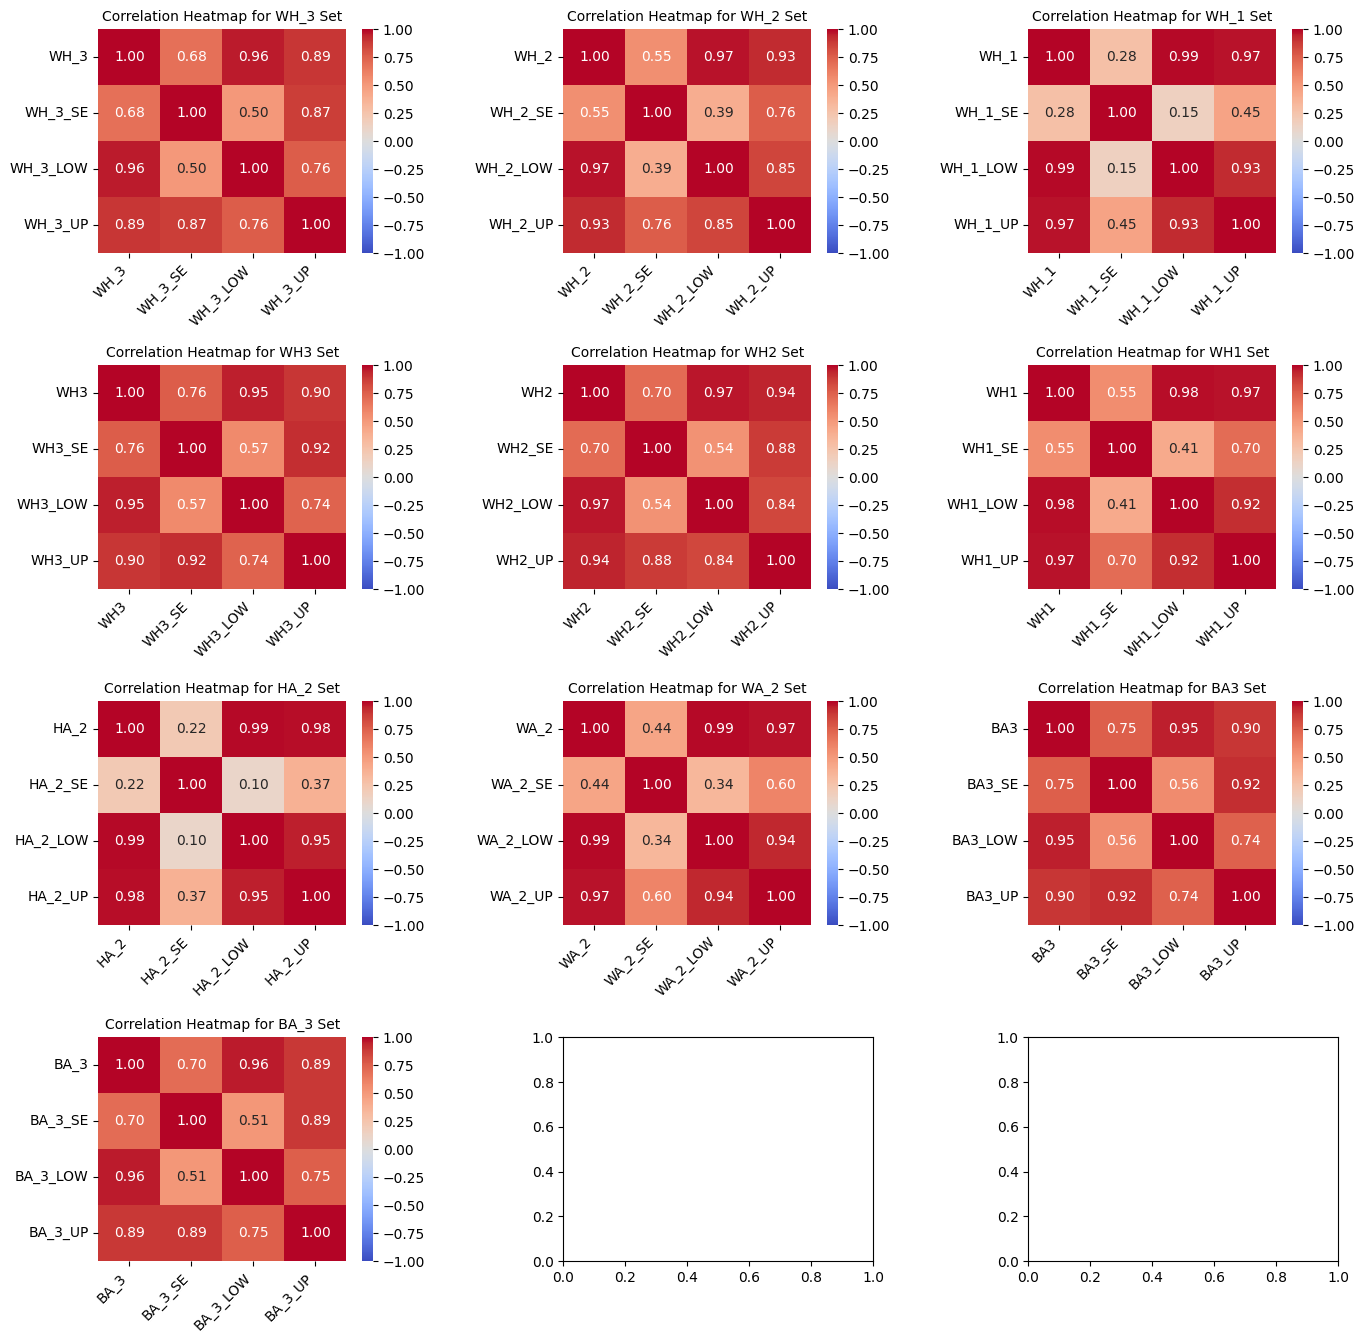

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the sets of columns
column_sets = {
    'WH_3': ['WH_3', 'WH_3_SE', 'WH_3_LOW', 'WH_3_UP'],
    'WH_2': ['WH_2', 'WH_2_SE', 'WH_2_LOW', 'WH_2_UP'],
    'WH_1': ['WH_1', 'WH_1_SE', 'WH_1_LOW', 'WH_1_UP'],
    'WH3': ['WH3', 'WH3_SE', 'WH3_LOW', 'WH3_UP'],
    'WH2': ['WH2', 'WH2_SE', 'WH2_LOW', 'WH2_UP'],
    'WH1': ['WH1', 'WH1_SE', 'WH1_LOW', 'WH1_UP'],
    'HA_2': ['HA_2', 'HA_2_SE', 'HA_2_LOW', 'HA_2_UP'],
    'WA_2': ['WA_2', 'WA_2_SE', 'WA_2_LOW', 'WA_2_UP'],
    'BA3': ['BA3', 'BA3_SE', 'BA3_LOW', 'BA3_UP'],
    'BA_3': ['BA_3', 'BA_3_SE', 'BA_3_LOW', 'BA_3_UP'],
}

# Number of heatmaps to display per row
heatmaps_per_row = 3
num_heatmaps = len(column_sets)
num_rows = (num_heatmaps + heatmaps_per_row - 1) // heatmaps_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, heatmaps_per_row, figsize=(16, 4 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to easily index

# Plot correlation heatmaps for each set
for i, (base_column, columns) in enumerate(column_sets.items()):
    subset_data = df17[columns].dropna()
    if not subset_data.empty:
        correlation_matrix = subset_data.corr()

        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', ax=axes[i])
        axes[i].set_title(f'Correlation Heatmap for {base_column} Set', fontsize=10)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right')
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)

# Adjust the spacing between plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


**PREPROCESSING STEP 18: Data Reduction using the Principle Component Analysis**

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to apply PCA on sets of related columns and add the first principal component to the dataset
def replace_with_pca_component(df17, main_column):
    related_columns = [main_column, main_column + '_SE', main_column + '_LOW', main_column + '_UP']
    subset_data = df17[related_columns].dropna()
    if not subset_data.empty:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(subset_data)
        pca = PCA(n_components=1)
        pca_result = pca.fit_transform(scaled_data)
        pca_column_name = main_column + '_PCA'
        df17[pca_column_name] = np.nan
        df17.loc[subset_data.index, pca_column_name] = pca_result.flatten()
        df17.drop(columns=related_columns, inplace=True)

# List of unique base column names (without _SE, _LOW, _UP)
base_columns = ['WH_3', 'WH_2', 'WH_1', 'WH1', 'WH2', 'WH3','HA_2','WA_2', 'BA_3','BA3']

# Apply PCA to each set of related columns and replace the original columns
for base in base_columns:
    replace_with_pca_component(df17, base)


df18 = df17.copy()

# Display the dataset with new PCA columns
df18.head()



,Country,YEAR,Gender,AGE,MeanSampleSize,SELREC,WH_3_PCA,WH_2_PCA,WH_1_PCA,WH1_PCA,WH2_PCA,WH3_PCA,HA_2_PCA,WA_2_PCA,BA_3_PCA,BA3_PCA
0,0,1.0,0,2.50,8.211890,1,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430
1,0,1.0,0,0.67,8.085949,0,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318
2,0,1.0,0,0.67,8.045107,0,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065
3,0,1.0,0,1.50,8.211890,0,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349
4,0,1.0,0,2.50,8.211890,0,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798


In [56]:
# Reorder columns with the specified column at the end
df18 = df18.reindex(columns=[col for col in df18.columns if col != 'SELREC'] + ['SELREC'])

df18.head()


,Country,YEAR,Gender,AGE,MeanSampleSize,WH_3_PCA,WH_2_PCA,WH_1_PCA,WH1_PCA,WH2_PCA,WH3_PCA,HA_2_PCA,WA_2_PCA,BA_3_PCA,BA3_PCA,SELREC
0,0,1.0,0,2.50,8.211890,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430,1
1,0,1.0,0,0.67,8.085949,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318,0
2,0,1.0,0,0.67,8.045107,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065,0
3,0,1.0,0,1.50,8.211890,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349,0
4,0,1.0,0,2.50,8.211890,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798,0


In [57]:
df18.shape

(29623, 16)

**PREPROCESSING STEP 19 : Rename the features with obvious meaningful names**

In [58]:
df18.rename(columns={'WH_3_PCA': 'severe_wasting',
                     'WH_2_PCA':'wasting',
                     'WH_1_PCA':'minor_wasting',
                     'WH1_PCA':'minor_overweight',
                     'WH2_PCA':'overweight',
                     'WH3_PCA':'obesity',
                     'HA_2_PCA':'stunting',
                     'WA_2_PCA':'underweight',
                     'BA_3_PCA':'severe_underweight',
                     'BA3_PCA': 'severe_obesity',
                    'SELREC':'malnutrition_risk'}, inplace=True)

df19 = df18.copy()
df19.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,severe_wasting,wasting,minor_wasting,minor_overweight,overweight,obesity,stunting,underweight,severe_underweight,severe_obesity,malnutrition_risk
0,0,1.0,0,2.50,8.211890,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430,1
1,0,1.0,0,0.67,8.085949,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318,0
2,0,1.0,0,0.67,8.045107,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065,0
3,0,1.0,0,1.50,8.211890,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349,0
4,0,1.0,0,2.50,8.211890,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798,0


**PREPROCESSING STEP 20: Resampling the dataset to avoid class imbalance**

**Identifying the Target Variable Class Distribution**

In [59]:
class_distribution = df19['malnutrition_risk'].value_counts()
print(class_distribution)


malnutrition_risk
0    27718
1     1905
Name: count, dtype: int64


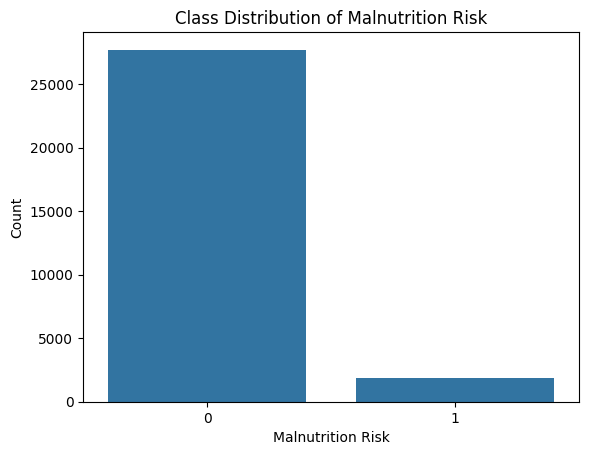

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for class distribution
sns.countplot(x='malnutrition_risk', data=df19)
plt.title('Class Distribution of Malnutrition Risk')
plt.xlabel('Malnutrition Risk')
plt.ylabel('Count')
plt.show()


## **SMOTE (Synthetic Minority Over-sampling Technique) for resampling**

Helping balance class distributions by generating synthetic samples for the minority class

Improving the performance of machine learning models on imbalanced datasets.

In [61]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df19 is your original DataFrame
# Separate input features and target
X = df19.drop(columns=['malnutrition_risk'])
y = df19['malnutrition_risk']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df20 = pd.DataFrame(X_resampled, columns=X.columns)
df20['malnutrition_risk'] = y_resampled

# Check the new class distribution
resampled_class_distribution = df20['malnutrition_risk'].value_counts()
print(resampled_class_distribution)


malnutrition_risk
1    27718
0    27718
Name: count, dtype: int64


malnutrition_risk
1    27718
0    27718
Name: count, dtype: int64


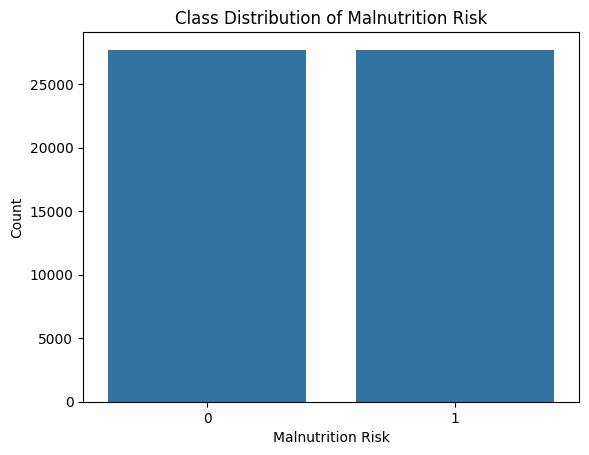

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution
class_distribution = df20['malnutrition_risk'].value_counts()
print(class_distribution)

# Visualize the class distribution
sns.countplot(x='malnutrition_risk', data=df20)
plt.title('Class Distribution of Malnutrition Risk')
plt.xlabel('Malnutrition Risk')
plt.ylabel('Count')
plt.show()


**Display the Final preprocessed Dataset**

In [64]:
df20.shape

(55436, 16)

In [65]:
df20.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,severe_wasting,wasting,minor_wasting,minor_overweight,overweight,obesity,stunting,underweight,severe_underweight,severe_obesity,malnutrition_risk
0,0,1.0,0,2.50,8.211890,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430,1
1,0,1.0,0,0.67,8.085949,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318,0
2,0,1.0,0,0.67,8.045107,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065,0
3,0,1.0,0,1.50,8.211890,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349,0
4,0,1.0,0,2.50,8.211890,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798,0


In [66]:
df20.drop(columns=['YEAR'], inplace=True)

In [67]:
df20.shape

(55436, 15)

In [68]:
df20.head()

,Country,Gender,AGE,MeanSampleSize,severe_wasting,wasting,minor_wasting,minor_overweight,overweight,obesity,stunting,underweight,severe_underweight,severe_obesity,malnutrition_risk
0,0,0,2.50,8.211890,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430,1
1,0,0,0.67,8.085949,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318,0
2,0,0,0.67,8.045107,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065,0
3,0,0,1.50,8.211890,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349,0
4,0,0,2.50,8.211890,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798,0


In [ ]:
# Save the updated DataFrame
df20.to_csv('/content/drive/MyDrive/DataScience/Project/DataPreprocessing/Presentation/Updated-ChildGrowthDataset-DataProcessing.csv', index=False)